# Using ML to predict whether university students will change their major

## Cassandra Lem

## Loading in the dataset and initial exploration

##### Overview:
- load in the student demographic dataset downloaded from https://zenodo.org/record/4114005#.ZDxbC3bMLIX as a Pandas dataframe
- view the dataframe
- plot part of a student's data, to show that we can work with the data
- split the data into training and testing sets, so that we don't touch the testing set

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# read in the student demographic dataset
student_data = pd.read_csv('anon_data.csv')

In [2]:
student_data.head()

,first_course_year,semester_idx,female,white_asian,start_age,first_gen,HS_Zip_Code,changed_major,n_majors,total_semester_credit_hours,...,Geography,Median income (dollars); Estimate; Households,Median income (dollars); Margin of Error; Households,Number; Estimate; FAMILIES - Families,Number; Margin of Error; FAMILIES - Families,Median income (dollars); Estimate; FAMILIES - Families,Median income (dollars); Margin of Error; FAMILIES - Families,zipstr,zip_median_income_log,anon_id
0,13.0,1.0,1.0,1.0,19.0,0.0,NaN,0.0,1.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125713
1,17.0,1.0,1.0,1.0,18.0,1.0,48867,0.0,2.0,14.0,...,ZCTA5 48867,43388.0,2198.0,7417.0,211.0,56442.0,4490.0,48867.0,4.751602,160343
2,3.0,1.0,0.0,1.0,26.0,0.0,NaN,0.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34721
3,0.0,1.0,0.0,1.0,18.0,0.0,34652,0.0,1.0,15.0,...,ZCTA5 34652,36329.0,3082.0,5958.0,369.0,48205.0,3885.0,34652.0,4.683092,6446
4,9.0,1.0,0.0,1.0,18.0,0.0,48346,0.0,1.0,15.0,...,ZCTA5 48346,74958.0,5627.0,6288.0,294.0,88802.0,7348.0,48346.0,4.948423,84932


In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553524 entries, 0 to 1553523
Data columns (total 38 columns):
 #   Column                                                         Non-Null Count    Dtype  
---  ------                                                         --------------    -----  
 0   first_course_year                                              1553524 non-null  float64
 1   semester_idx                                                   1553524 non-null  float64
 2   female                                                         1553524 non-null  float64
 3   white_asian                                                    1553524 non-null  float64
 4   start_age                                                      1553516 non-null  float64
 5   first_gen                                                      1553524 non-null  float64
 6   HS_Zip_Code                                                    1321499 non-null  object 
 7   changed_major                       

In [4]:
student_data.describe()

,first_course_year,semester_idx,female,white_asian,start_age,first_gen,changed_major,n_majors,total_semester_credit_hours,cumulative_credit_hours,...,Id2,Median income (dollars); Estimate; Households,Median income (dollars); Margin of Error; Households,Number; Estimate; FAMILIES - Families,Number; Margin of Error; FAMILIES - Families,Median income (dollars); Estimate; FAMILIES - Families,Median income (dollars); Margin of Error; FAMILIES - Families,zipstr,zip_median_income_log,anon_id
count,1.553524e+06,1.553524e+06,1.553524e+06,1.553524e+06,1.553516e+06,1.553524e+06,1.553524e+06,1.553524e+06,1.553524e+06,1.553524e+06,...,1.214473e+06,1.214011e+06,1.213999e+06,1.214473e+06,1.214473e+06,1.213914e+06,1.213886e+06,1.214473e+06,1.213914e+06,1.553524e+06
mean,1.044161e+01,5.816834e+00,5.381526e-01,8.411380e-01,1.891371e+01,6.687505e-02,1.029395e-01,1.447938e+00,1.211224e+01,6.554879e+01,...,4.854853e+04,6.866413e+04,4.404016e+03,6.295577e+03,2.568353e+02,8.479300e+04,5.922059e+03,4.854853e+04,4.895082e+00,9.696487e+04
std,6.007226e+00,3.538393e+00,4.985424e-01,3.655475e-01,2.332895e+00,2.498056e-01,3.038800e-01,7.859206e-01,3.588156e+00,3.689527e+01,...,6.961209e+03,2.773536e+04,2.527117e+03,3.181366e+03,9.373243e+01,3.258884e+04,3.494210e+03,6.961209e+03,1.756870e-01,5.428954e+04
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,6.930000e+02,1.087300e+04,8.670000e+02,0.000000e+00,6.000000e+00,9.081000e+03,1.269000e+03,6.930000e+02,3.958134e+00,0.000000e+00
25%,5.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,3.200000e+01,...,4.817600e+04,4.969200e+04,2.805000e+03,4.087000e+03,1.890000e+02,6.196200e+04,3.815000e+03,4.817600e+04,4.792125e+00,5.058500e+04
50%,1.100000e+01,5.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01,6.200000e+01,...,4.838200e+04,6.364600e+04,3.688000e+03,6.064000e+03,2.490000e+02,8.057400e+04,5.208000e+03,4.838200e+04,4.906195e+00,9.835100e+04
75%,1.600000e+01,8.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.400000e+01,9.400000e+01,...,4.900700e+04,8.169600e+04,5.212000e+03,8.221000e+03,3.220000e+02,9.920600e+04,6.860000e+03,4.900700e+04,4.996538e+00,1.440540e+05
max,2.000000e+01,1.600000e+01,1.000000e+00,1.000000e+00,7.300000e+01,1.000000e+00,1.000000e+00,1.500000e+01,3.200000e+01,2.220000e+02,...,9.980100e+04,2.500000e+05,7.285000e+04,2.778300e+04,8.780000e+02,2.500000e+05,1.244510e+05,9.980100e+04,5.397940e+00,1.886840e+05


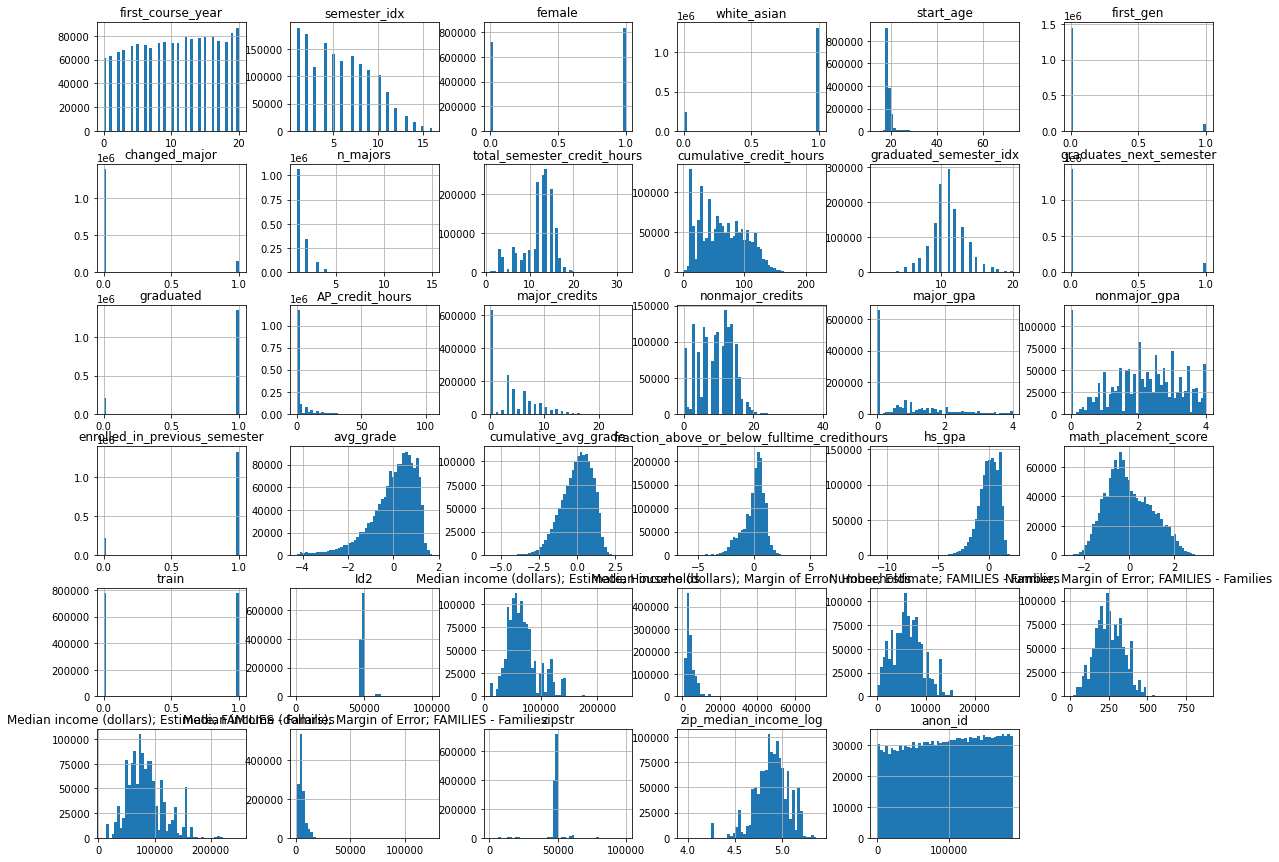

In [5]:
student_data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
# print every instance in the data for student 160343

student_160343 = student_data.loc[student_data['anon_id'] == 160343]
print(student_160343)

        first_course_year  semester_idx  female  white_asian  start_age  \
1                    17.0           1.0     1.0          1.0       18.0   
94343                17.0           2.0     1.0          1.0       18.0   
182870               17.0           3.0     1.0          1.0       18.0   
241440               17.0           4.0     1.0          1.0       18.0   
391695               17.0           6.0     1.0          1.0       18.0   
455395               17.0           7.0     1.0          1.0       18.0   
523387               17.0           8.0     1.0          1.0       18.0   
584722               17.0           9.0     1.0          1.0       18.0   
639935               17.0          10.0     1.0          1.0       18.0   

        first_gen HS_Zip_Code  changed_major  n_majors  \
1             1.0       48867            0.0       2.0   
94343         1.0       48867            0.0       3.0   
182870        1.0       48867            0.0       3.0   
241440        1.0

Text(0, 0.5, 'Major GPA')

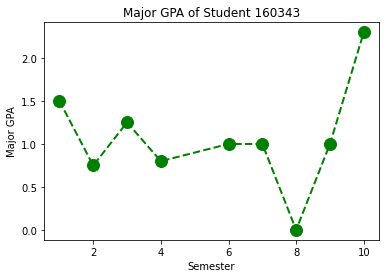

In [7]:
# take some of student 160343's data and plot it to show that we can access and work with the data

student_gpa = student_160343['major_gpa'].to_numpy()
sem_idx = student_160343['semester_idx'].to_numpy()

import matplotlib.pyplot as plt

plt.plot(sem_idx, student_gpa, 'go--', linewidth=2, markersize=12)
plt.title('Major GPA of Student 160343')
plt.xlabel('Semester')
plt.ylabel('Major GPA')

In [8]:
# split dataset into training and testing sets (80-20 split), set aside test set

#from sklearn.model_selection import train_test_split

#y = student_data["changed_major"]
#X = student_data.drop(columns=["changed_major"])

#student_train_X, student_test_X, student_train_y, student_test_y = train_test_split(X, y, test_size=0.5, random_state=1)

In [9]:
#student_test_y

In [10]:
#student_train_y = pd.DataFrame(student_train_y, columns=["changed_major"])
#student_test_y = pd.DataFrame(student_test_y, columns=["changed_major"])

In [11]:
#student_train_y

In [12]:
#student_train = pd.concat([student_train_X, student_train_y], axis=1)
#student_test = pd.concat([student_test_X, student_test_y], axis=1)

In [13]:
#student_train.head()

In [14]:
# split dataset into training and testing sets, set aside test set
student_train = student_data.loc[student_data['train'] == 1]
student_test = student_data.loc[student_data['train'] == 0]

## Exploratory Data Analysis

##### Overview:
- study various aspects of the features: meaning, data types, missing values, importance for the task, categorical or continuous
- generate histograms for each feature to visualize distribution
- generate Pearson correlation coefficients between the target feature `changed_major` and each other feature
- generate and plot kernel density estimator (KDE) functions
- for some of the binary features, generate contingency tables and corresponding tetrachoric correlation coefficients or chi-square scores to compare with `changed_major`
- calculated point biserial correlation coefficients to compare some of the continuous features with `changed_major`

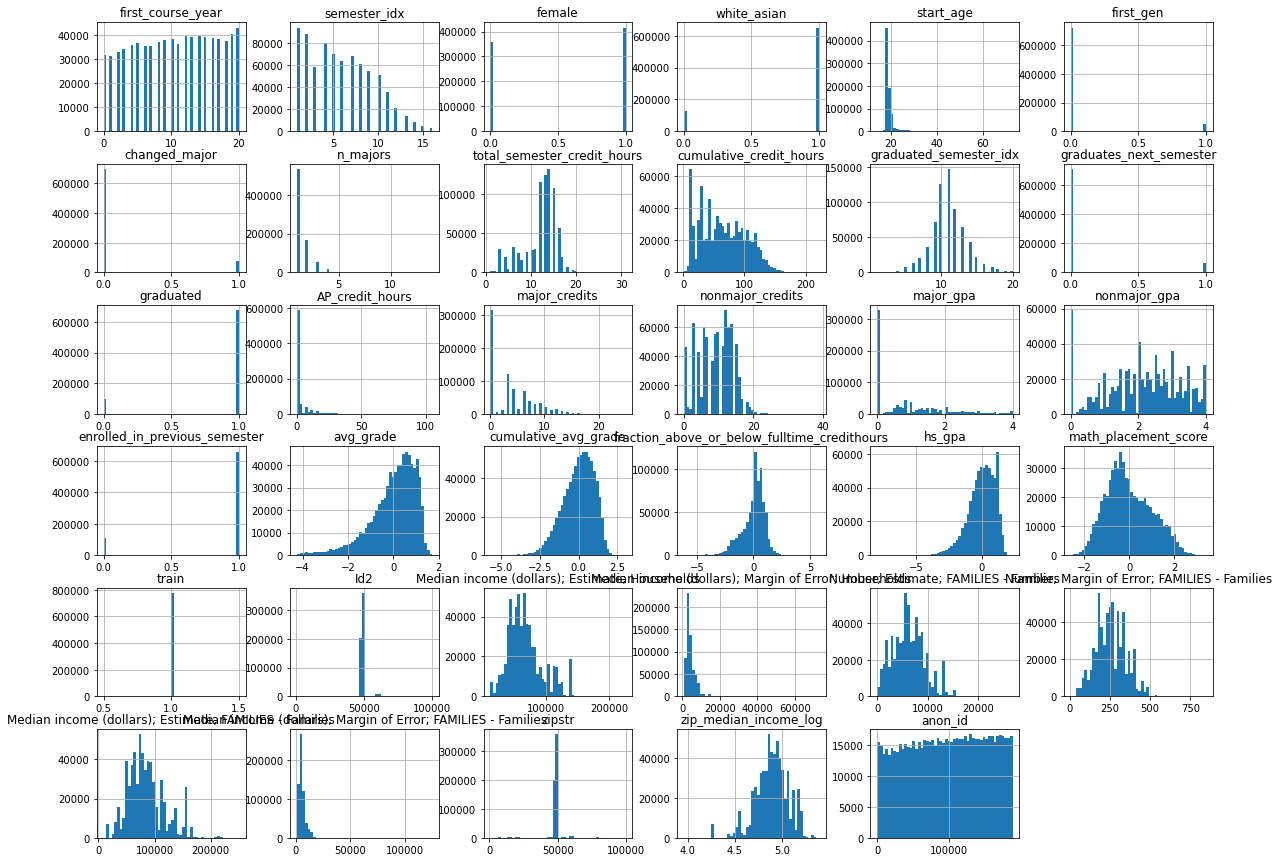

In [15]:
# generate histograms for each feature

student_train.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
corr_matrix = student_train.corr()
corr_matrix["changed_major"].sort_values(ascending=False)

changed_major                                                    1.000000
nonmajor_credits                                                 0.107008
enrolled_in_previous_semester                                    0.085090
nonmajor_gpa                                                     0.063725
total_semester_credit_hours                                      0.054287
graduated_semester_idx                                           0.051926
fraction_above_or_below_fulltime_credithours                     0.029327
Number; Margin of Error; FAMILIES - Families                     0.002640
Number; Estimate; FAMILIES - Families                            0.001653
white_asian                                                      0.000326
zipstr                                                           0.000046
Id2                                                              0.000046
Median income (dollars); Estimate; Households                   -0.000087
Median income (dollars); Estimate; FAM

#### Features that are missing values:
`start_age` (2 `nan` values), `graduated_semester_idx`, `enrolled_in_previous_semester`, `hs_gpa`, `math_placement_score`, `Median income (dollars); Estimate; Households`, 
`Median income (dollars); Estimate; FAMILIES - Families`

#### Binary categorical features:
`female`, `white_asian`, `first_gen`, `changed_major`, `graduates_next_semester`, `graduated`, `enrolled_in_previous_semester`

#### Multi-categorical features:
`semester_idx`, `start_age`, `n_majors`, `graduated_semester_idx`, 

#### Continuous features:
`major_gpa`, `nonmajor_gpa`, `avg_grade`, `cumulative_avg_grade`, `fraction_above_or_below_fulltime_credithours`, `hs_gpa`, `math_placement_score`, `Median income (dollars); Estimate; Households`?, `cumulative_credit_hours`?

#### Interesting features to explore:
`semester_idx`, `start_age`, `female`, `major_gpa`, `nonmajor_gpa`, `avg_grade`, `major_credits`, `nonmajor_credits`, `enrolled_in_previous_semester`, `graduates_next_semester`

In [17]:
# create a dataframe with some of the binary features

student_train_binary = student_train[['female', 'white_asian', 'first_gen', 'changed_major']]
student_train_binary

,female,white_asian,first_gen,changed_major
0,1.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
776352,0.0,1.0,0.0,0.0
776353,0.0,1.0,0.0,0.0
776354,0.0,1.0,0.0,0.0
776355,0.0,1.0,0.0,0.0


In [18]:
import seaborn as sns

# create a dataframe with some of the multi-categorical features, use seaborn to visualize the correlations between them

student_train_multi = student_train[['start_age', 'semester_idx', 'changed_major']]

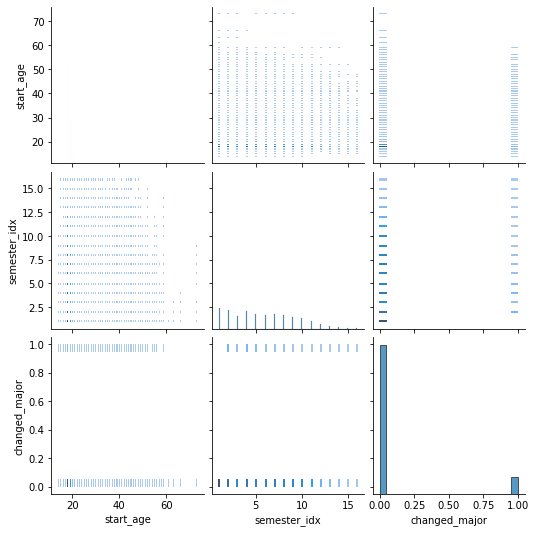

In [19]:
sns.pairplot(student_train_multi, kind="hist")

In [20]:
# prepare to plot a kernel density estimator function to visualize the relationship between start_age and
# changed_major=0

no_maj_change_ages = student_train_multi.loc[student_train_multi['changed_major'] == 0]['start_age']
no_maj_change_ages.value_counts(dropna=False)

18.0    407464
19.0    171309
20.0     46127
21.0     25773
22.0     11293
23.0      6799
17.0      5467
24.0      4476
25.0      3590
26.0      2720
27.0      2046
28.0      1364
29.0      1094
30.0       862
31.0       745
32.0       557
33.0       510
35.0       413
16.0       412
34.0       402
37.0       385
39.0       358
36.0       323
43.0       273
41.0       264
38.0       257
40.0       253
42.0       217
45.0       177
47.0       124
44.0       101
48.0       100
49.0        88
46.0        86
15.0        83
50.0        62
52.0        57
55.0        42
51.0        22
14.0        21
53.0        21
54.0        20
56.0        18
59.0        15
73.0         9
57.0         7
58.0         4
66.0         4
63.0         3
NaN          2
61.0         1
Name: start_age, dtype: int64

In [21]:
# drop nan values, sort by age
no_maj_change_ages = no_maj_change_ages.dropna()
# no_maj_change_ages = no_maj_change_ages.sort_values()

age_counts = no_maj_change_ages.value_counts(dropna=False)
age_counts = pd.DataFrame({'start_age':age_counts.index, 'count':age_counts.values})
age_counts

,start_age,count
0,18.0,407464
1,19.0,171309
2,20.0,46127
3,21.0,25773
4,22.0,11293
5,23.0,6799
6,17.0,5467
7,24.0,4476
8,25.0,3590
9,26.0,2720


In [22]:
age_counts = age_counts.sort_values(by='start_age')
age_counts

,start_age,count
39,14.0,21
34,15.0,83
18,16.0,412
6,17.0,5467
0,18.0,407464
1,19.0,171309
2,20.0,46127
3,21.0,25773
4,22.0,11293
5,23.0,6799


In [23]:
no_maj_change_age_data = np.unique(np.asarray(no_maj_change_ages))
no_maj_change_age_data = no_maj_change_age_data[~np.isnan(no_maj_change_age_data)]
print(no_maj_change_age_data)
num_points = len(no_maj_change_age_data)

[14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.
 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.
 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 61. 63. 66. 73.]


In [24]:
gauss_weights = age_counts['count'].to_numpy()
gauss_weights

array([    21,     83,    412,   5467, 407464, 171309,  46127,  25773,
        11293,   6799,   4476,   3590,   2720,   2046,   1364,   1094,
          862,    745,    557,    510,    402,    413,    323,    385,
          257,    358,    253,    264,    217,    273,    101,    177,
           86,    124,    100,     88,     62,     22,     57,     21,
           20,     42,     18,      7,      4,     15,      1,      3,
            4,      9], dtype=int64)

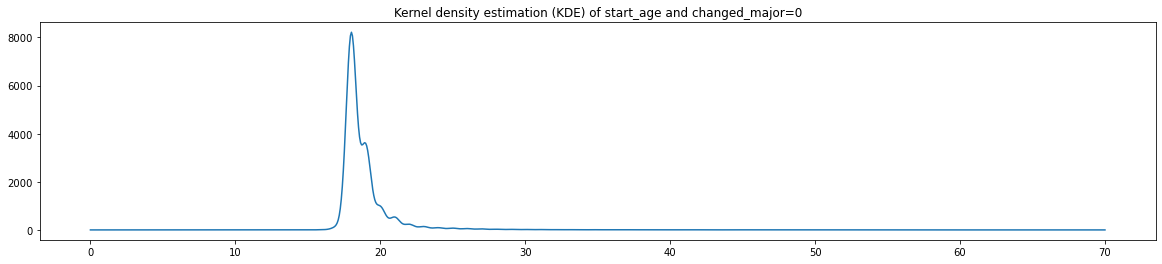

In [25]:
# generate and plot the KDE of the start_age and changed_major=0 data

L = 0.25
x = np.linspace(0, 70, 1000)
y = np.zeros(len(x))

for i in range(num_points):
    y += gauss_weights[i]*np.exp(-(x - no_maj_change_age_data[i])**2/L)/num_points

plt.figure(figsize=(20,4))
plt.plot(x,y)
# plt.vlines(no_maj_change_age_data, 0, 1, alpha=0.2)
plt.title("Kernel density estimation (KDE) of start_age and changed_major=0")
plt.show()

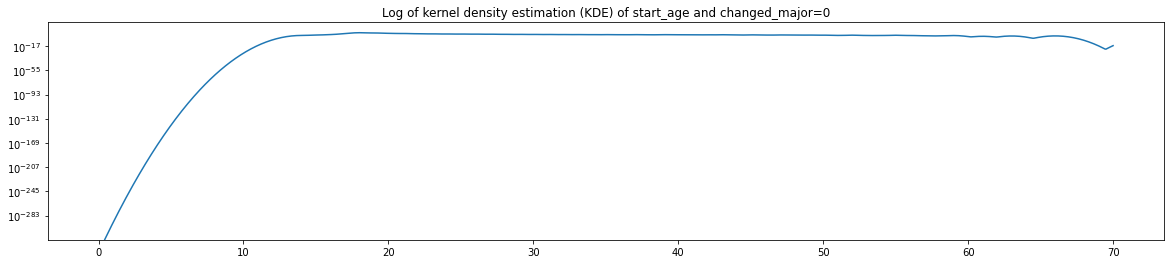

In [26]:
# view the log of the KDE

plt.figure(figsize=(20,4))
plt.semilogy(x,y)
# plt.vlines(no_maj_change_age_data, 0, 1, alpha=0.2)
plt.title("Log of kernel density estimation (KDE) of start_age and changed_major=0")
plt.show()

In [27]:
no_maj_change_sem = student_train_multi.loc[student_train_multi['changed_major'] == 0]['semester_idx']
no_maj_change_sem.value_counts(dropna=False)

1.0     94342
2.0     71385
4.0     65141
7.0     60848
5.0     58041
6.0     56596
8.0     56429
9.0     52666
3.0     51009
10.0    48686
11.0    34513
12.0    20127
13.0    13195
14.0     7524
15.0     3963
16.0     2355
Name: semester_idx, dtype: int64

In [28]:
sem_counts = no_maj_change_sem.value_counts(dropna=False)
sem_counts = pd.DataFrame({'semester_idx':sem_counts.index, 'count':sem_counts.values})
sem_counts = sem_counts.sort_values(by='semester_idx')
sem_counts

,semester_idx,count
0,1.0,94342
1,2.0,71385
8,3.0,51009
2,4.0,65141
4,5.0,58041
5,6.0,56596
3,7.0,60848
6,8.0,56429
7,9.0,52666
9,10.0,48686


In [29]:
no_maj_change_sem_data = np.asarray(sem_counts['semester_idx'])
print(no_maj_change_sem_data)
num_points2 = len(no_maj_change_sem_data)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


In [30]:
gauss_weights2 = np.asarray(sem_counts['count'])
gauss_weights2

array([94342, 71385, 51009, 65141, 58041, 56596, 60848, 56429, 52666,
       48686, 34513, 20127, 13195,  7524,  3963,  2355], dtype=int64)

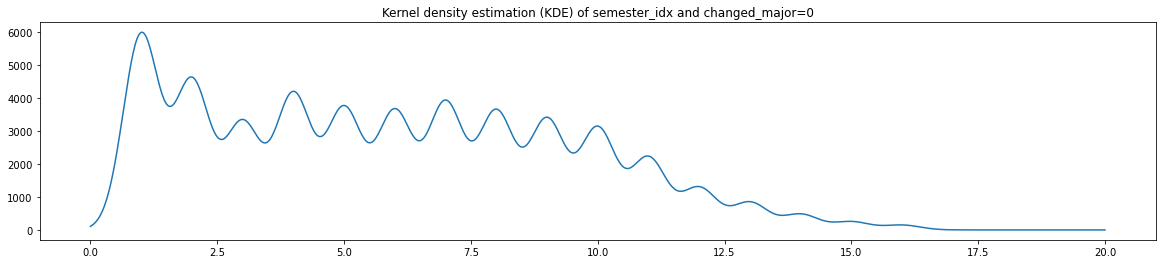

In [31]:
# generate and plot the KDE of the semester_idx and changed_major=0 data

L = 0.25
x = np.linspace(0, 20, 1000)
y = np.zeros(len(x))

for i in range(num_points2):
    y += gauss_weights2[i]*np.exp(-(x - no_maj_change_sem_data[i])**2/L)/num_points2

plt.figure(figsize=(20,4))
plt.plot(x,y)
# plt.vlines(no_maj_change_age_data, 0, 1, alpha=0.2)
plt.title("Kernel density estimation (KDE) of semester_idx and changed_major=0")
plt.show()

In [32]:
maj_change_sem = student_train_multi.loc[student_train_multi['changed_major'] == 1]['semester_idx']
sem_counts2 = maj_change_sem.value_counts(dropna=False)
sem_counts2

2.0     17143
4.0     15218
5.0     11855
3.0      7560
7.0      7144
6.0      7104
8.0      4906
9.0      2547
10.0     2110
11.0     1407
12.0      992
13.0      694
14.0      453
15.0      259
16.0      145
Name: semester_idx, dtype: int64

In [33]:
sem_counts2 = pd.DataFrame({'semester_idx':sem_counts2.index, 'count':sem_counts2.values})
sem_counts2 = sem_counts2.sort_values(by='semester_idx')
sem_counts2

,semester_idx,count
0,2.0,17143
3,3.0,7560
1,4.0,15218
2,5.0,11855
5,6.0,7104
4,7.0,7144
6,8.0,4906
7,9.0,2547
8,10.0,2110
9,11.0,1407


In [34]:
maj_change_sem_data = np.asarray(sem_counts2['semester_idx'])
print(maj_change_sem_data)
num_points3 = len(maj_change_sem_data)

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


In [35]:
gauss_weights3 = np.asarray(sem_counts2['count'])
gauss_weights3

array([17143,  7560, 15218, 11855,  7104,  7144,  4906,  2547,  2110,
        1407,   992,   694,   453,   259,   145], dtype=int64)

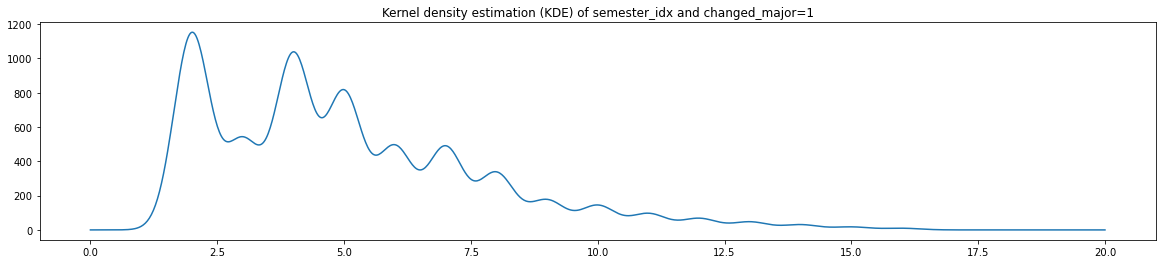

In [36]:
# generate and plot the KDE of the semester_idx and changed_major=1 data

L = 0.25
x = np.linspace(0, 20, 1000)
y = np.zeros(len(x))

for i in range(num_points3):
    y += gauss_weights3[i]*np.exp(-(x - maj_change_sem_data[i])**2/L)/num_points3

plt.figure(figsize=(20,4))
plt.plot(x,y)
# plt.vlines(no_maj_change_age_data, 0, 1, alpha=0.2)
plt.title("Kernel density estimation (KDE) of semester_idx and changed_major=1")
plt.show()

Notice an initial peak around semester 2 (end of first year), then another peak around semesters 4 and 5 (end of second/beginning of third year)

In [37]:
# generate contingency table for the features `first_gen` and `changed_major`

first_gen = student_train['first_gen'].to_numpy()
changed_major = student_train['changed_major'].to_numpy()

cont_table_fgen = pd.crosstab(first_gen, changed_major, rownames=['first_gen'], colnames=['changed_major'])
cont_table_fgen

changed_major,0.0,1.0
first_gen,,
0.0,650194,74425
1.0,46626,5112


<AxesSubplot:xlabel='changed_major', ylabel='first_gen'>

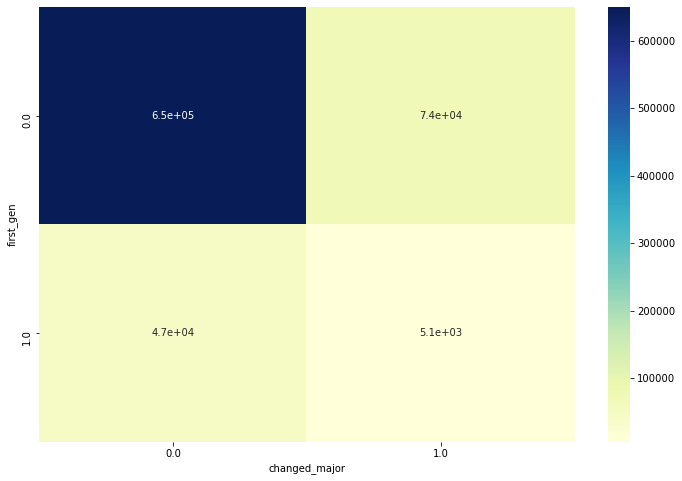

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(cont_table_fgen, annot=True, cmap="YlGnBu")

In [39]:
import math

cont_table_matrix_fgen = cont_table_fgen
a = cont_table_matrix_fgen[0][0]
b = cont_table_matrix_fgen[0][1]
c = cont_table_matrix_fgen[1][0]
d = cont_table_matrix_fgen[1][1]

tet_firstgen = math.cos(180/(1+math.sqrt((b*c)/(a*d))))
print('Tetrachoric correlation coefficient for first_gen and changed_major: ', tet_firstgen)

Tetrachoric correlation coefficient for first_gen and changed_major:  0.48367587433409676


In [40]:
# perform chi-square test

from scipy.stats import chi2_contingency

c_fgen, p_fgen, dof_fgen, expected_fgen = chi2_contingency(cont_table_fgen)
print('Chi square value: ', c_fgen)
print('p value: ', p_fgen)
print('Degrees of freedom: ', dof_fgen)

Chi square value:  7.960142993527462
p value:  0.004781863614743619
Degrees of freedom:  1


In [41]:
# generate contingency table for the features `female` and `changed_major`

female = student_train['female'].to_numpy()

cont_table_fem = pd.crosstab(female, changed_major, rownames=['female'], colnames=['changed_major'])
cont_table_fem

changed_major,0.0,1.0
female,,
0.0,323155,36997
1.0,373665,42540


<AxesSubplot:xlabel='changed_major', ylabel='female'>

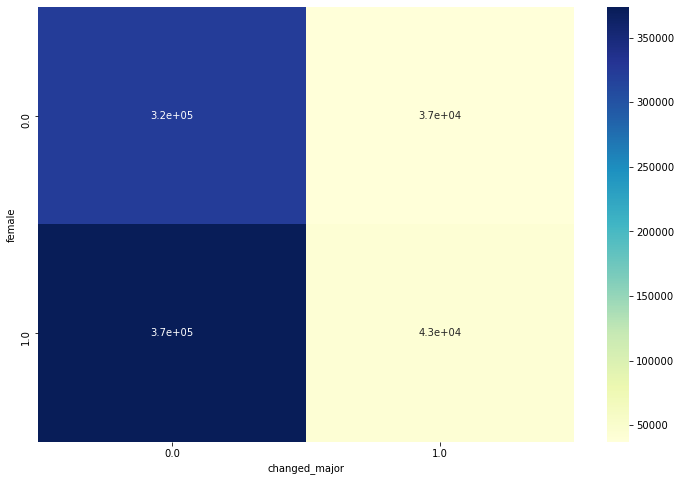

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(cont_table_fem, annot=True, cmap="YlGnBu")

In [43]:
cont_table_matrix_fem = cont_table_fem
a = cont_table_matrix_fem[0][0]
b = cont_table_matrix_fem[0][1]
c = cont_table_matrix_fem[1][0]
d = cont_table_matrix_fem[1][1]

tet_female = math.cos(180/(1+math.sqrt((b*c)/(a*d))))
print('Tetrachoric correlation coefficient for female and changed_major: ', tet_female)

Tetrachoric correlation coefficient for female and changed_major:  -0.33175966050530625


In [44]:
c_fem, p_fem, dof_fem, expected_fem = chi2_contingency(cont_table_fem)
print('Chi square value (female, changed_major): ', c_fem)
print('p value (female, changed_major): ', p_fem)
print('Degrees of freedom: ', dof_fem)

Chi square value (female, changed_major):  0.5552466030086549
p value (female, changed_major):  0.4561818239817499
Degrees of freedom:  1


In [45]:
# generate contingency table for the features `enrolled_in_previous_semester` and `changed_major`

enroll_prev = student_train['enrolled_in_previous_semester'].to_numpy()

cont_table_enr = pd.crosstab(enroll_prev, changed_major, rownames=['enrolled_in_previous_semester'], colnames=['changed_major'])
cont_table_enr

changed_major,0.0,1.0
enrolled_in_previous_semester,,
0.0,103283,4173
1.0,584999,74768


<AxesSubplot:xlabel='changed_major', ylabel='enrolled_in_previous_semester'>

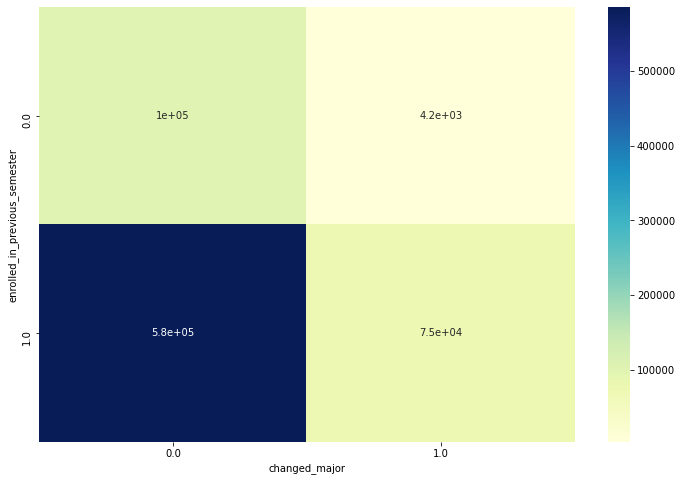

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(cont_table_enr, annot=True, cmap="YlGnBu")

In [47]:
cont_table_matrix_enr = cont_table_enr
a = cont_table_matrix_enr[0][0]
b = cont_table_matrix_enr[0][1]
c = cont_table_matrix_enr[1][0]
d = cont_table_matrix_enr[1][1]

tet_enr_prev = math.cos(180/(1+math.sqrt((b*c)/(a*d))))
print('Tetrachoric correlation coefficient for enrolled_in_previous_semester and changed_major: ', tet_enr_prev)

Tetrachoric correlation coefficient for enrolled_in_previous_semester and changed_major:  -0.5229467236048072


In [48]:
c_enr, p_enr, dof_enr, expected_enr = chi2_contingency(cont_table_enr)
print('Chi square value (enrolled_in_previous_semester, changed_major): ', c_enr)
print('p value (enrolled_in_previous_semester, changed_major): ', p_enr)
print('Degrees of freedom: ', dof_enr)

Chi square value (enrolled_in_previous_semester, changed_major):  5554.0634931494205
p value (enrolled_in_previous_semester, changed_major):  0.0
Degrees of freedom:  1


In [49]:
# generate contingency table for the features `enrolled_in_previous_semester` and `changed_major`

grad_next = student_train['graduates_next_semester'].to_numpy()

cont_table_grad = pd.crosstab(grad_next, changed_major, rownames=['graduates_next_semester'], colnames=['changed_major'])
cont_table_grad

changed_major,0.0,1.0
graduates_next_semester,,
0.0,632449,78282
1.0,64371,1255


<AxesSubplot:xlabel='changed_major', ylabel='graduates_next_semester'>

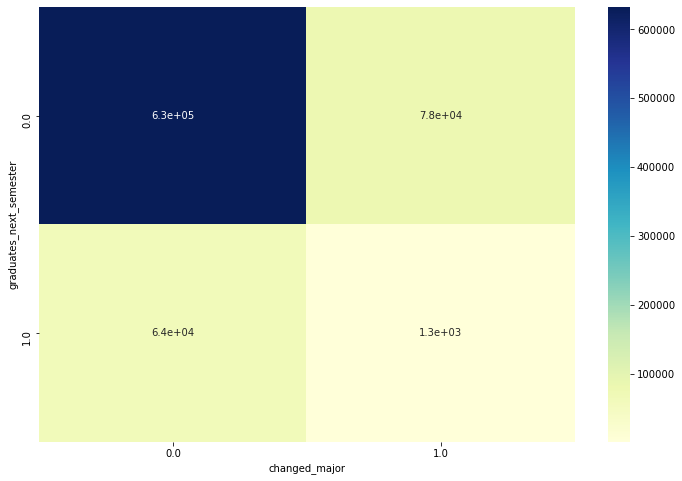

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(cont_table_grad, annot=True, cmap="YlGnBu")

In [51]:
cont_table_matrix_grad = cont_table_grad
a = cont_table_matrix_grad[0][0]
b = cont_table_matrix_grad[0][1]
c = cont_table_matrix_grad[1][0]
d = cont_table_matrix_grad[1][1]

tet_enr_grad = math.cos(180/(1+math.sqrt((b*c)/(a*d))))
print('Tetrachoric correlation coefficient for graduates_next_semester and changed_major: ', tet_enr_grad)

Tetrachoric correlation coefficient for graduates_next_semester and changed_major:  0.6403357466708572


In [52]:
c_grad, p_grad, dof_grad, expected_grad = chi2_contingency(cont_table_grad)
print('Chi square value (graduates_next_semester, changed_major): ', c_grad)
print('p value (graduates_next_semester, changed_major): ', p_grad)
print('Degrees of freedom: ', dof_grad)

Chi square value (graduates_next_semester, changed_major):  5411.797639017353
p value (graduates_next_semester, changed_major):  0.0
Degrees of freedom:  1


In [53]:
# generate contingency table for the features `semester_idx` and `changed_major`

sem_idx = student_train['semester_idx'].to_numpy()

cont_table_sem = pd.crosstab(sem_idx, changed_major, rownames=['semester_idx'], colnames=['changed_major'])
cont_table_sem

changed_major,0.0,1.0
semester_idx,,
1.0,94342,0
2.0,71385,17143
3.0,51009,7560
4.0,65141,15218
5.0,58041,11855
6.0,56596,7104
7.0,60848,7144
8.0,56429,4906
9.0,52666,2547


<AxesSubplot:xlabel='changed_major', ylabel='semester_idx'>

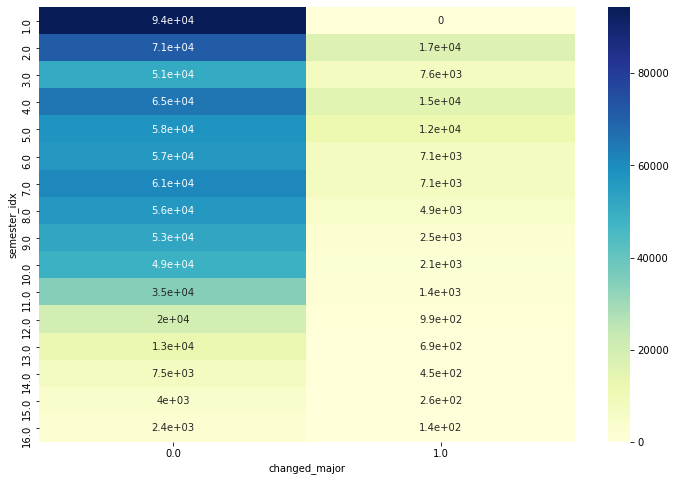

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(cont_table_sem, annot=True, cmap="YlGnBu")

In [55]:
c_sem, p_sem, dof_sem, expected_sem = chi2_contingency(cont_table_sem)
print('Chi square value (semester_idx, changed_major): ', c_sem)
print('p value (semester_idx, changed_major): ', p_sem)
print('Degrees of freedom: ', dof_sem)

Chi square value (semester_idx, changed_major):  36610.834247118066
p value (semester_idx, changed_major):  0.0
Degrees of freedom:  15


In [56]:
# generate contingency table for the features `graduated_semester_idx` and `changed_major`

grad_idx = student_train['graduated_semester_idx'].to_numpy()

cont_table_grad_idx = pd.crosstab(grad_idx, changed_major, rownames=['graduated_semester_idx'], colnames=['changed_major'])
cont_table_grad_idx

changed_major,0.0,1.0
graduated_semester_idx,,
1.0,6,0
2.0,30,0
3.0,290,0
4.0,1629,48
5.0,8092,320
6.0,13497,662
7.0,19267,1231
8.0,33956,2855
9.0,64938,6574


<AxesSubplot:xlabel='changed_major', ylabel='graduated_semester_idx'>

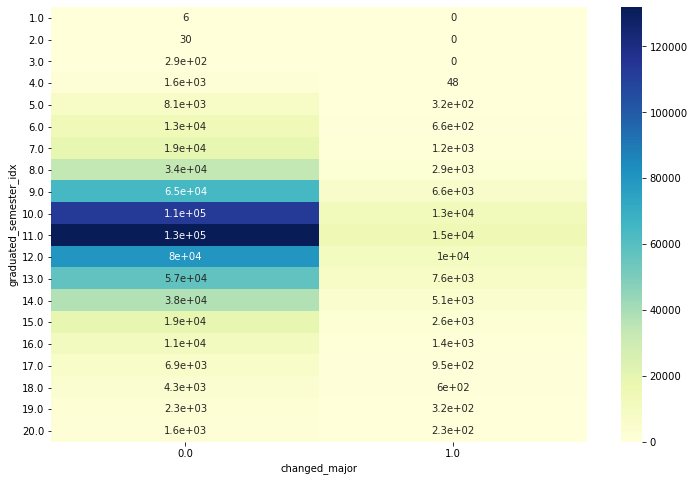

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(cont_table_grad_idx, annot=True, cmap="YlGnBu")

In [58]:
c_grad_idx, p_grad_idx, dof_grad_idx, expected_grad_idx = chi2_contingency(cont_table_grad_idx)
print('Chi square value (semester_idx, changed_major): ', c_grad_idx)
print('p value (semester_idx, changed_major): ', p_grad_idx)
print('Degrees of freedom: ', dof_grad_idx)

Chi square value (semester_idx, changed_major):  2325.3570497172955
p value (semester_idx, changed_major):  0.0
Degrees of freedom:  19


In [59]:
# generate contingency table for the features `graduated_semester_idx` and `changed_major`

n_majors = student_train['n_majors'].to_numpy()

cont_table_nmajors = pd.crosstab(n_majors, changed_major, rownames=['n_majors'], colnames=['changed_major'])
cont_table_nmajors

changed_major,0.0,1.0
n_majors,,
1.0,476993,56192
2.0,152415,16911
3.0,47925,4796
4.0,14008,1219
5.0,4062,329
6.0,1051,66
7.0,283,17
8.0,59,6
9.0,15,1


<AxesSubplot:xlabel='changed_major', ylabel='n_majors'>

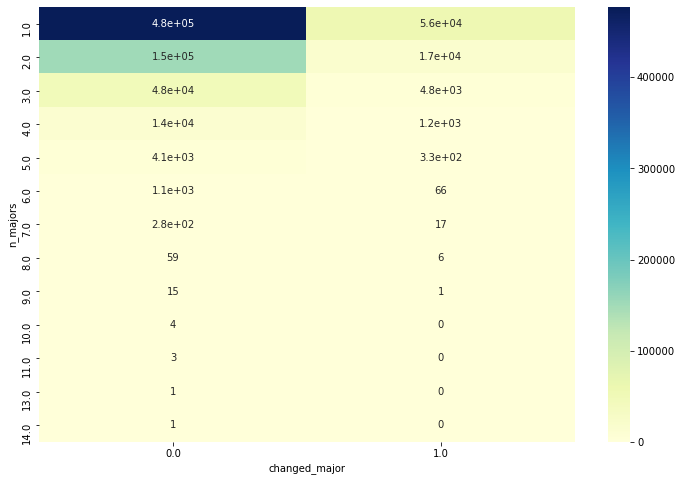

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(cont_table_nmajors, annot=True, cmap="YlGnBu")

In [61]:
c_nmajors, p_nmajors, dof_nmajors, expected_nmajors = chi2_contingency(cont_table_nmajors)
print('Chi square value (n_majors, changed_major): ', c_nmajors)
print('p value (n_majors, changed_major): ', p_nmajors)
print('Degrees of freedom: ', dof_nmajors)

Chi square value (n_majors, changed_major):  288.1836321667238
p value (n_majors, changed_major):  1.4156694576091602e-54
Degrees of freedom:  12


In [62]:
from scipy.stats import pointbiserialr

maj_gpa_array = np.asarray(student_train['major_gpa'])
change_major_array = np.asarray(student_train['changed_major'])

r_maj_gpa, p_maj_gpa = pointbiserialr(maj_gpa_array, change_major_array)
print(r_maj_gpa)

-0.09297590694911488


In [63]:
cum_avg_gpa_array = np.asarray(student_train['cumulative_avg_grade'])

r_cum_avg, p_cum_avg = pointbiserialr(cum_avg_gpa_array, change_major_array)
print(r_cum_avg)

-0.05586866793420442


In [64]:
nonmaj_gpa_array = np.asarray(student_train['nonmajor_gpa'])

r_nonmaj_gpa, p_nonmaj_gpa = pointbiserialr(nonmaj_gpa_array, change_major_array)
print(r_nonmaj_gpa)

0.06372491738021885


### Summary of significant/interesting results from the EDA:

- Generation of Pearson correlation coefficients showed the highest correlations between `changed_major` and `nonmajor_credits`, `enrolled_in_previous_semester`, `nonmajor_gpa`, `total_semester_credit_hours`, `graduated_semester_idx`, `major_gpa`, `major_credits`, `graduates_next_semester`, `semester_idx`, `cumulative_credit_hours`, `cumulative_avg_grade`
- Chi-square tests showed association between `changed_major` and `first_gen`, `enrolled_in_previous_semester`, `graduates_next_semester`, `semester_idx`, `graduated_semester_idx`, `n_majors`

## Data Preparation

##### Overview:

Do the following for both the train and test sets
- delete features that we don't plan on using
- impute missing values for the following features: `start_age` (2 NaNs), `graduated_semester_idx`, `enrolled_in_previous_semester`
- one-hot encode most of the binary/categorical features (except for the ones with many categories)
- use standard scaling to scale the numerical features, since they are mostly normal distribution
- create X and y train sets and test sets

In [65]:
# create copy of datasets, drop the features that we will not use

student_train_edit = student_train.drop(columns=['hs_gpa', 'math_placement_score', 'Median income (dollars); Estimate; FAMILIES - Families',
                    'Median income (dollars); Margin of Error; FAMILIES - Families', 'Median income (dollars); Estimate; Households',
                      'Median income (dollars); Margin of Error; Households', 'Id2', 'Id', 'anon_id', 'first_course_year',
                    'Number; Estimate; FAMILIES - Families', 'Number; Margin of Error; FAMILIES - Families',
                    'zip_median_income_log', 'train', 'Geography', 'zipstr', 'HS_Zip_Code'])

student_test_edit = student_test.drop(columns=['hs_gpa', 'math_placement_score', 'Median income (dollars); Estimate; FAMILIES - Families',
                    'Median income (dollars); Margin of Error; FAMILIES - Families', 'Median income (dollars); Estimate; Households',
                      'Median income (dollars); Margin of Error; Households', 'Id2', 'Id', 'anon_id', 'first_course_year',
                    'Number; Estimate; FAMILIES - Families', 'Number; Margin of Error; FAMILIES - Families',
                    'zip_median_income_log', 'train', 'Geography', 'zipstr', 'HS_Zip_Code'])

In [66]:
for col in student_train_edit.columns:
    print(col)

semester_idx
female
white_asian
start_age
first_gen
changed_major
n_majors
total_semester_credit_hours
cumulative_credit_hours
graduated_semester_idx
graduates_next_semester
graduated
AP_credit_hours
major_credits
nonmajor_credits
major_gpa
nonmajor_gpa
enrolled_in_previous_semester
avg_grade
cumulative_avg_grade
fraction_above_or_below_fulltime_credithours


In [67]:
# impute missing values

#from scipy.stats import mode

# use the mode for start_age missing values
#mode_age, count_age = mode(np.asarray(student_train_edit['start_age']))
#mode_age = mode_age[0]
#print(mode_age)

#student_train_edit['start_age'] = student_train_edit['start_age'].fillna(mode_age)

In [68]:
# check that there are no NaNs
#student_train_edit['start_age'].isna().sum()

In [69]:
# use the mode for graduated_semester_idx missing values

#mode_grad_idx, count_grad_idx = mode(np.asarray(student_train_edit['graduated_semester_idx']))
#mode_grad_idx = mode_grad_idx[0]
#print(mode_grad_idx)

#student_train_edit['graduated_semester_idx'] = student_train_edit['graduated_semester_idx'].fillna(mode_grad_idx)

In [70]:
# check that there are no NaNs
#student_train_edit['graduated_semester_idx'].isna().sum()

In [71]:
# impute 0 for all enrolled_in_previous_semester missing values in semester 1

student_train_edit.loc[student_train_edit['semester_idx']==1, ['enrolled_in_previous_semester']] = student_train_edit.loc[student_train_edit['semester_idx']==1, ['enrolled_in_previous_semester']].fillna(0)

In [72]:
# check that there are no NaNs in semester 1 for enrolled_in_previous_semester

student_train_edit.loc[student_train_edit['semester_idx']==1, ['enrolled_in_previous_semester']].isna().sum()

enrolled_in_previous_semester    0
dtype: int64

In [73]:
# for simplicity's sake, impute 1 for all enrolled_in_previous_semester missing values in other semesters
# there are only missing values up to semester 6, so have loop run to 6th semester

for i in range(2, 7):
    student_train_edit.loc[student_train_edit['semester_idx']==i, ['enrolled_in_previous_semester']] = student_train_edit.loc[student_train_edit['semester_idx']==i, ['enrolled_in_previous_semester']].fillna(1)

In [74]:
# check that there are no NaNs left

student_train_edit['enrolled_in_previous_semester'].isna().sum()

0

In [75]:
student_test_edit.loc[student_test_edit['semester_idx']==1, ['enrolled_in_previous_semester']] = student_test_edit.loc[student_test_edit['semester_idx']==1, ['enrolled_in_previous_semester']].fillna(0)
# student_test_edit.loc[student_test_edit['semester_idx']==1, ['enrolled_in_previous_semester']].isna().sum()

for i in range(2, 16):
    student_test_edit.loc[student_test_edit['semester_idx']==i, ['enrolled_in_previous_semester']] = student_test_edit.loc[student_test_edit['semester_idx']==i, ['enrolled_in_previous_semester']].fillna(1)
    
student_test_edit['enrolled_in_previous_semester'].isna().sum()

0

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer

# create a custom transformer for the enrolled_in_previous_semester column
#class Enr_Prev_Imputer(TransformerMixin):
    
    #def fit(self, X, y):
        # self.fill_with = X.columns
        #return self

    #def transform(self, X):
        #X = X.fillna(0)


# other_attribs = list(student_train)
cat_attribs = ['female', 'white_asian', 'first_gen', 'n_majors', 
               'graduates_next_semester', 'graduated', 'enrolled_in_previous_semester']
scale_attribs = ['total_semester_credit_hours', 'cumulative_credit_hours', 'AP_credit_hours',
                'major_credits', 'nonmajor_credits', 'major_gpa', 'nonmajor_gpa', 'avg_grade', 'cumulative_avg_grade',
                'fraction_above_or_below_fulltime_credithours']
# mode_attribs = ['start_age', 'graduated_semester_idx']

full_pipeline = ColumnTransformer(
                [("impute mode age", SimpleImputer(strategy="most_frequent"), ['start_age']),
                ("impute mode sem", SimpleImputer(strategy="most_frequent"), ['graduated_semester_idx']),
                # ("impute enrolled_in_previous_semester", Enr_Prev_Imputer(), ['enrolled_in_previous_semester'])
                # ("cat", OneHotEncoder(handle_unknown='infrequent_if_exist'), cat_attribs),
                ("scale", StandardScaler(), scale_attribs)],
                remainder='passthrough')

student_train_prepared = full_pipeline.fit_transform(student_train_edit.drop(columns=['changed_major']))
student_test_prepared = full_pipeline.transform(student_test_edit.drop(columns=['changed_major']))

In [77]:
# create X and y train and test sets

y_train = np.asarray(student_train['changed_major'])
X_train = student_train_prepared
y_test = np.asarray(student_test['changed_major'])
X_test = student_test_prepared

X_train[0]

array([19.        , 10.        ,  0.52680296, -1.3970803 , -0.42315496,
       -0.93040847,  0.99186733, -0.85619561,  1.37992502,  0.8248729 ,
        0.8248729 ,  0.28301645,  1.        ,  1.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ])

In [78]:
X_train.shape

(776357, 20)

In [79]:
X_test.shape

(777167, 20)

In [80]:
np.count_nonzero(np.isnan(student_train_prepared))

0

## Training initial models

##### Overview:
- Train the following models: Stochastic Gradient Descent classifier (SGDClassifier), logistic regression
- Use recursive feature elimination to further select features (15 out of the original 20) before training each model
- Use cross-validation

In [81]:
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFE

# create SGDClassifier estimator
sgd_clf = SGDClassifier(random_state=42)
# create recursive feature elimination object, fit to data and create new X train array
rfe_sgd = RFE(estimator=sgd_clf, n_features_to_select=15)
X_train_sgd = rfe_sgd.fit_transform(X_train, y_train)
X_test_sgd = rfe_sgd.transform(X_test)

In [82]:
print(rfe_sgd.support_)
print(rfe_sgd.ranking_)

[ True  True  True  True False  True  True False  True False  True  True
 False False  True  True  True  True  True  True]
[1 1 1 1 5 1 1 6 1 2 1 1 3 4 1 1 1 1 1 1]


In [83]:
# train the SGDClassifier estimator
sgd_clf.fit(X_train_sgd, y_train)

SGDClassifier(random_state=42)

In [84]:
# predict on the test set
#sgd_predictions = sgd_clf.predict(X_test_sgd)

In [85]:
#unique, counts = np.unique(sgd_predictions, return_counts=True)
#unique

In [86]:
from sklearn.metrics import mean_squared_error

#sgd_mse = mean_squared_error(y_test, sgd_predictions)
#sgd_rmse = np.sqrt(sgd_mse)
#sgd_rmse

In [87]:
from sklearn.model_selection import cross_val_predict, cross_val_score

sgd_cross_val_pred = cross_val_predict(sgd_clf, X_train_sgd, y_train, cv=3)

# with np.printoptions(threshold=np.inf):
    # print(sgd_cross_val_pred)

print(sgd_cross_val_pred)

[0. 0. 0. ... 0. 0. 0.]


In [88]:
sgd_scores = cross_val_score(sgd_clf, X_train_sgd, y_train, scoring="neg_mean_squared_error", cv=3)
sgd_scores

array([-0.10244758, -0.10245145, -0.10244798])

In [89]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, sgd_cross_val_pred)

array([[696820,      0],
       [ 79537,      0]], dtype=int64)

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train, sgd_cross_val_pred))
print(recall_score(y_train, sgd_cross_val_pred))

C:\Users\Cassandra\anaconda_3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0
0.0


In [91]:
#from sklearn.ensemble import RandomForestClassifier

#rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [92]:
#rfe_rnd = RFE(estimator=rnd_clf, n_features_to_select=15)
#rfe_rnd.fit(X_train, y_train)
#X_train_rnd = rfe_rnd.fit_transform(X_train, y_train)

In [93]:
#rfe_cross_val_pred = cross_val_predict(rnd_clf, X_train_rnd, y_train, cv=3)

In [94]:
from sklearn.linear_model import LogisticRegression, LinearRegression

log_reg = LogisticRegression(max_iter=1000)

In [118]:
# define a function to generate cross validation scores for every

def rfe_vary_features(est, num_features):
    max_scores = np.zeros(num_features-1)
    num_features = 2
    for i in range(2, num_features+1):
        rfe_log = RFE(estimator=est, n_features_to_select=i)
        X_train_log = rfe_log.fit_transform(X_train, y_train)
        log_cross_val_scores = cross_val_score(log_reg, X_train_log, y_train, cv=3)
        max_scores[i-2] = np.amax(log_cross_val_scores)
    return max_scores

In [119]:
max_log_scores = rfe_vary_features(log_reg, 20)

In [120]:
max_log_scores

array([0.89755242, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [95]:
rfe_log = RFE(estimator=log_reg, n_features_to_select=15)
X_train_log = rfe_log.fit_transform(X_train, y_train)
X_test_log = rfe_log.transform(X_test)

In [96]:
log_cross_val_pred = cross_val_predict(log_reg, X_train_log, y_train, cv=3)

In [97]:
log_cross_val_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [98]:
confusion_matrix(y_train, log_cross_val_pred)

array([[624607,  72213],
       [ 79222,    315]], dtype=int64)

In [99]:
print(precision_score(y_train, log_cross_val_pred))
print(recall_score(y_train, log_cross_val_pred))

0.004343150231634679
0.003960420936168073


In [100]:
f1_score(y_train, log_cross_val_pred)

0.004142965179364088

In [101]:
log_scores = cross_val_score(log_reg, X_train_log, y_train, scoring="neg_mean_squared_error", cv=3)
log_scores

array([-0.38027559, -0.10245145, -0.10244798])

## Fine-tune promising models

- Use randomized search to tune the hyperparameters of the logistic regression model

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
rand_grid = dict(C=C, penalty=penalty, solver=solver)

rand_search = RandomizedSearchCV(log_reg, rand_grid, cv=5, scoring='accuracy',
                                return_train_score=True, random_state = 1)
rand_search.fit(X_train_log, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=1, return_train_score=True, scoring='accuracy')

In [110]:
final_model = rand_search.best_estimator_
final_predictions = final_model.predict(X_test_log)

In [112]:
confusion_matrix(y_test, final_predictions)

array([[696785,      0],
       [ 80382,      0]], dtype=int64)